# Spline accuracy

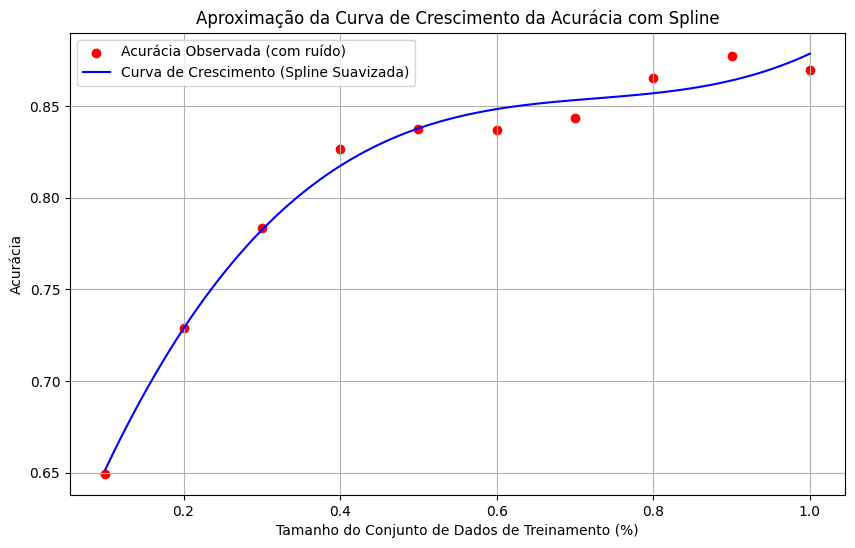

In [9]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# Dados simulados (exemplo)
# x = porcentagem do conjunto de dados
# y = acurácia do modelo
x_data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y_data = np.array([0.65, 0.72, 0.78, 0.81, 0.83, 0.84, 0.85, 0.86, 0.865, 0.87])

# Adiciona um pouco de ruído para ilustrar o suavização
y_noisy = y_data + np.random.normal(0, 0.01, size=len(y_data))

# Crie a spline suavizante
# O parâmetro 's' controla a suavidade. 's=0' é uma interpolação exata.
# Um valor maior resulta em uma curva mais suave. Ajuste conforme necessário.
spline = UnivariateSpline(x_data, y_noisy)
# spline = InterpolatedUnivariateSpline(x_data, y_noisy)

# Gere novos pontos para a curva suavizada
x_smooth = np.linspace(0.1, 1.0, 100)
y_smooth = spline(x_smooth)

# Plote os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_noisy, color='red', label='Acurácia Observada (com ruído)')
plt.plot(x_smooth, y_smooth, color='blue', label='Curva de Crescimento (Spline Suavizada)')
plt.title('Aproximação da Curva de Crescimento da Acurácia com Spline')
plt.xlabel('Tamanho do Conjunto de Dados de Treinamento (%)')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()


MagDerivative: 0.024527380952380884
MagDerivative: -0.006535978835978751
MagDerivative: 0.02130912698412682
MagDerivative: 0.032015873015873046
MagDerivative: 0.02903662818662822
MagDerivative: 0.029186713286713167


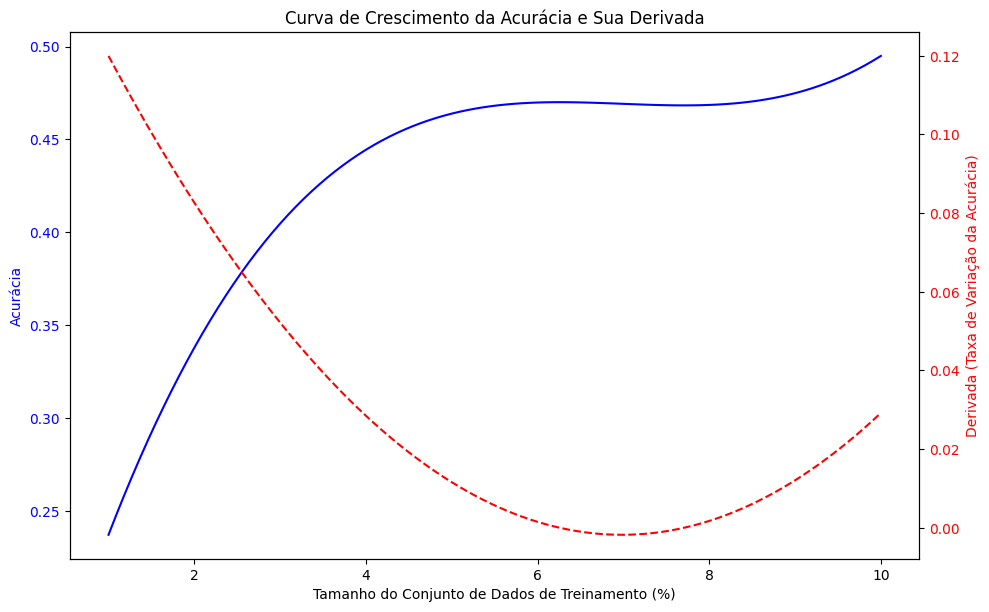

In [36]:
# Dados simulados (exemplo)
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_data = np.array([0.2268, 0.3552, 0.4027, 0.448, 0.4611, 0.451, 0.4711, 0.4812, 0.4813, 0.4874])
# y_data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# y_noisy = y_data + np.random.normal(0, 0.01, size=len(y_data))

for size in range(5, 11):
    # Crie a spline suavizante
    spline = UnivariateSpline(x_data[:size], y_data[:size])
    
    # Obtenha a spline da primeira derivada
    derivative_spline = spline.derivative(n=1)
    
    # Calcule a magnitude da derivada nos pontos de dados originais
    derivative_values = derivative_spline(x_data[:size])
    
    print(f"MagDerivative: {derivative_values[-1]}")
    
    # Opcional: Plote a curva original e a derivada para visualização
    x_smooth = np.linspace(1, size, 100)
    y_smooth = spline(x_smooth)
    y_derivative_smooth = derivative_spline(x_smooth)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Tamanho do Conjunto de Dados de Treinamento (%)')
ax1.set_ylabel('Acurácia', color='blue')
ax1.plot(x_smooth, y_smooth, color='blue', label='Curva de Crescimento')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Derivada (Taxa de Variação da Acurácia)', color='red')
ax2.plot(x_smooth, y_derivative_smooth, color='red', linestyle='--', label='Derivada da Curva')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Curva de Crescimento da Acurácia e Sua Derivada')
plt.show()